In [106]:
import numpy as np

class Perceptron:
    
    def __init__(self, bias_input=1):
        self.bias_input = bias_input
        
    def fit(self, X, y, learning_rate=0.01, num_epochs=100, stop_criterion=0.1):
        """Trains the perceptron on the given input data and labels.
        
        Parameters:
            X (numpy.ndarray): The input data, where each row is an Observation and each column is a feature.
            y (numpy.ndarray): The labels for the input data, with values of -1 or 1.
            learning_rate (float): The learning rate for the perceptron algorithm.
            num_epochs (int): The maximum number of epochs to train the perceptron.
            stop_criterion (float): The minimum change in the weights between epochs required for the training to stop.
        """
        if not np.all(np.isin(y, [-1, 1])):
            raise ValueError("The labels must be -1 or 1.")
        if X.shape[0] != y.shape[0]:
            raise ValueError("The dimensions of X and y do not match.")
            
        self.weights = np.random.rand(X.shape[1])
        self.bias_weight = 0
        
        for epoch in range(num_epochs):
            prev_weights = np.copy(self.weights)
            for i in range(X.shape[0]):
                weighted_sum = np.dot(X[i], self.weights) + self.bias_input * self.bias_weight
                predicted_label = np.sign(weighted_sum)
                if predicted_label != y[i]:
                    self.weights += learning_rate * y[i] * X[i]
                    self.bias_weight += learning_rate * y[i] * self.bias_input
                    
            weight_change = np.linalg.norm(self.weights - prev_weights)
            if weight_change < stop_criterion:
                break
        
    def predict(self, X):
        """Predicts the label for the given input data.
        
        Parameters:
            X (numpy.ndarray): The input data, where each row is an example and each column is a feature.
            
        Returns:
            predicted_lablels (numpy.ndarray): The predicted labels for the input data, with values of -1 or 1.
        """
        if X.shape[1] != self.weights.shape[0]:
            raise ValueError("The dimensions of X do not match the dimensions of the trained weights.")
        
        weighted_sums = np.dot(X, self.weights) + self.bias_input * self.bias_weight
        predicted_labels = np.sign(weighted_sums)
        return predicted_labels

In [127]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a random binary classification dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)
y[y==0] = -1
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Perceptron object and train it on the training set
perceptron = Perceptron(bias_input=1)
perceptron.fit(X_train, y_train, learning_rate=0.1, num_epochs=1000, stop_criterion=0.01)

# Use the trained model to make predictions on the test set
y_pred = perceptron.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.64


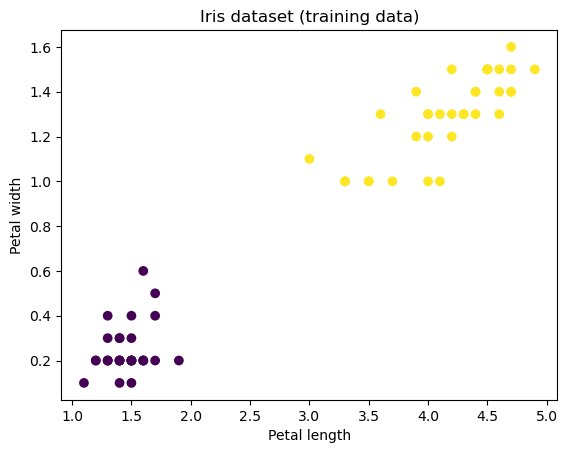

In [130]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Load the iris dataset
iris = load_iris()

# Select the petal length and width features
X = iris.data[:100, 2:4]

# Select only the first two classes (setosa and versicolor)
y = iris.target[:100]
y[y==0] = -1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Plot the training data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris dataset (training data)')
plt.show()